In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import os
import numpy as np
import cv2
from keras.models import load_model
import tensorflow as tf

Using TensorFlow backend.


In [0]:
path='/content/gdrive/My Drive/one_gait_cycle'

In [0]:
subjs=os.listdir(path)

## **Train VGG for CASIA_OCC_DET**

In [0]:
from tensorflow.python.keras.applications import VGG16
temp_model=VGG16(include_top=True,weights='imagenet')

 65970176/553467096 [==>...........................] - ETA: 21s

KeyboardInterrupt: ignored

In [0]:
import keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense,Flatten,Dropout
from tensorflow.python.keras import Model
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [0]:
change_layer=temp_model.get_layer('fc2')

In [0]:
half_model=Model(inputs=temp_model.input,outputs=change_layer.output)
#modified_model=sequential()
half_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
new_model=Sequential()
new_model.add(half_model)
new_model.add(Dense(1))

In [0]:
#new_model=Sequential()
#new_model.add(temp_model)
#new_model.add(Dense(1))

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 4096)              134260544 
_________________________________________________________________
dense (Dense)                (None, 1)                 4097      
Total params: 134,264,641
Trainable params: 134,264,641
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer=Adam(lr=1e-5)
new_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
vgg=[]
training=[]
t=0
for i in subjs:
  nm_path=os.listdir(os.path.join(path,i))
  nm_path.sort()
  #print(nm_path[0])
  nm_05=os.path.join(os.path.join(path,i),nm_path[0])
  imgs=os.listdir(nm_05)
  temp_arr05=[]
  #print(t)
  for j in imgs:
    img_path=os.path.join(os.path.join(os.path.join(path,i),nm_path[0]),j)
    img=cv2.imread(img_path)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(224,224))
    #ret,img_=cv2.threshold(img,127,1,cv2.THRESH_BINARY)
    #img_=np.array(img).astype('float32') / 255.
    temp_arr05.append(img)
    training.append(img)
  vgg.append(np.asarray(temp_arr05))
training=np.asarray(training)
  #t=t+1

In [0]:
blank_training=[]
for i in range(1000):
  blank_training.append(np.zeros((224,224,3)))
blank_training=np.asarray(blank_training)

In [0]:
blank_training.shape
train_vgg=training[:1000]
train_vgg.shape

(1000, 224, 224, 3)

In [0]:
training_set=np.concatenate([train_vgg,blank_training],axis=0)

In [0]:
labels=[]
for i in range(2000):
  if i <1000:
    labels.append(1)
  else:
    labels.append(0)
labels=np.asarray(labels)

In [0]:
p = np.random.permutation(2000)

In [0]:
shuffle_training_set=training_set[p]
shuffle_labels=labels[p]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(shuffle_training_set,shuffle_labels,test_size=.2,random_state=42)

In [0]:
new_model.fit(preprocess_input(X_train),y_train, batch_size=64, epochs=3,validation_data=(preprocess_input(X_test),y_test), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1600 samples, validate on 400 samples
Epoch 1/3
1600/1600 [==============================] - 62s 39ms/sample - loss: 0.0228 - acc: 0.9819 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/3
1600/1600 [==============================] - 48s 30ms/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/3
1600/1600 [==============================] - 48s 30ms/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000


In [0]:
from keras.models import load_model

new_model.save('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5')

## **Occ_Detection in CASIA**

In [0]:
nm05=[]
labels_nm05=[]
t=0
for i in subjs:
  if int(i) != 121:
    nm_path=os.listdir(os.path.join(path,i))
    nm_path.sort()
    #print(nm_path[0])
    nm_05=os.path.join(os.path.join(path,i),nm_path[0])
    imgs=os.listdir(nm_05)
    temp_arr05=[]
    #print(t)
    for j in imgs:
      img_path=os.path.join(os.path.join(os.path.join(path,i),nm_path[0]),j)
      img=cv2.imread(img_path)
      img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img=cv2.resize(img,(256,256))
      ret,img_=cv2.threshold(img,127,1,cv2.THRESH_BINARY)
      temp_arr05.append(img_)
    labels_nm05.append(i)
    nm05.append(np.asarray(temp_arr05))
    t=t+1

In [6]:
#os.listdir('/content/gdrive/My Drive/one_gait_cycle/122/nm-05')
subjs[0]

'009'

In [0]:
vgg_=[]
labels_vgg=[]
t=0
for i in subjs:
  if int(i) != 121:
    nm_path=os.listdir(os.path.join(path,i))
    nm_path.sort()
    #print(nm_path[0])
    nm_05=os.path.join(os.path.join(path,i),nm_path[0])
    imgs=os.listdir(nm_05)
    temp_arr05=[]
    #print(t)
    for j in imgs:
      img_path=os.path.join(os.path.join(os.path.join(path,i),nm_path[0]),j)
      img=cv2.imread(img_path)
      #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img=cv2.resize(img,(224,224))
      #ret,img_=cv2.threshold(img,127,1,cv2.THRESH_BINARY)
      #img_=np.array(img).astype('float32') / 255.
      temp_arr05.append(img)
    labels_vgg.append(i)
    vgg_.append(np.asarray(temp_arr05))
    t=t+1

In [0]:
labels_nm05=np.asarray(labels_nm05)
labels_vgg=np.asarray(labels_vgg)

In [9]:
labels_vgg==labels_nm05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [0]:
nm05=np.asarray(nm05)
vgg_=np.asarray(vgg_)

In [11]:
vgg_[0][0].shape

(224, 224, 3)

In [12]:
img.shape

(224, 224, 3)

In [13]:
nm05[0].shape

(25, 256, 256)

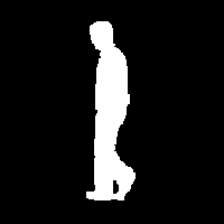

In [14]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[0][1])

In [29]:
np.random.randint(10,len(nm05[0]), size=np.int_((len(nm05[0]))/20))

array([21])

## **Creating 5% occlusion**

In [0]:
occ5=nm05.copy()

In [31]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*5)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

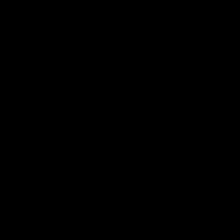

In [33]:
cv2_imshow(vgg_[0][5])

In [34]:
occ_index[0]

array([5])

In [35]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.applications.vgg16 import preprocess_input
#inp=preprocess_input(img[0])
#for i in range(len(occ5()))
#inp=cv2.resize(occ5[0][15],(224,224))
#img = np.stack((inp,)*3, axis=-1)
y=m.predict_classes(np.expand_dims(vgg_[0][22],axis=0))

In [37]:
y

array([[1]], dtype=int32)

In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [39]:
occ_detected[22]

array([13])

In [40]:
occ_index[22]

array([13])

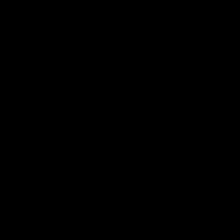

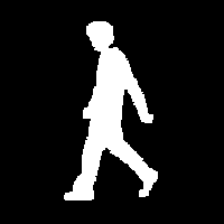

In [27]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][7])
cv2_imshow(vgg_[22][21])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/5_frames_occ_created/occ_created_randomly_det_using_vgg_05_5%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

In [0]:
from scipy.io import loadmat
r=loadmat('/content/gdrive/My Drive/Results_GAIT/dhriti_res_mat.mat')

In [0]:
r.keys()

dict_keys(['__header__', '__version__', '__globals__', '009', '003', '006', '001', '008', '002', '004', '011', '007', '010', '012', '018', '015', '013', '016', '019', '014', '021', '017', '020', '025', '031', '023', '024', '026', '027', '032', '029', '030', '022', '035', '043', '041', '033', '038', '036', '039', '040', '042', '037', '044', '049', '050', '045', '051', '047', '054', '056', '055', '052', '057', '060', '063', '058', '061', '066', '070', '069', '059', '062', '078', '083', '082', '084', '072', '073', '079', '071', '075', '080', '087', '088', '092', '091', '094', '085', '093', '090', '089', '086', '101', '103', '105', '106', '096', '095', '097', '099', '104', '100', '113', '108', '111', '115', '107', '112', '110', '117', '118', '114', '123', '119', '124', '120', '122'])

In [0]:
import os
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
subj='/content/gdrive/My Drive/Casia_B_Croped_Image'
sub_n=os.listdir(subj)
sub_n.sort()

In [0]:
const=[]
y_const=[]
for i in sub_n:
  if int(i)!=121:
    const.append(r[i])
    y_const.append(i)
const=np.asarray(const)
y_const=np.asarray(y_const)

In [0]:
const[0].shape

(25, 256, 256, 1)

In [0]:
#cv2_imshow(np.squeeze(const[0][10])*255)

In [0]:
rec_gei=[]
for i in range(105):
  temp=np.zeros((256,256,1))
  for j in range(len(const[i])):
    temp=temp+const[i][j]
  rec_gei.append(temp/len(const[i]))
rec_gei=np.asarray(rec_gei)

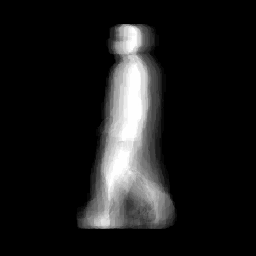

In [0]:
cv2_imshow(np.squeeze(rec_gei[3])*255)

## **Creating 10%Occlusion**

In [0]:
occ5=nm05.copy()

In [15]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*10)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

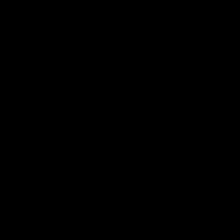

In [19]:
cv2_imshow(vgg_[0][7])

In [20]:
occ_index[0]

array([ 7, 10])

In [21]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.applications.vgg16 import preprocess_input
#inp=preprocess_input(img[0])
#for i in range(len(occ5()))
#inp=cv2.resize(occ5[0][15],(224,224))
#img = np.stack((inp,)*3, axis=-1)
y=m.predict_classes(np.expand_dims(vgg_[0][12],axis=0))

In [23]:
y

array([[1]], dtype=int32)

In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [25]:
occ_detected[22]

array([5, 8])

In [26]:
occ_index[22]

array([5, 8])

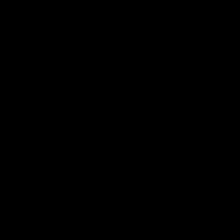

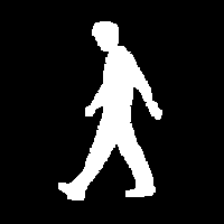

In [44]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][15])
cv2_imshow(vgg_[22][19])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/5_frames_occ_created/occ_created_randomly_det_using_vgg_05_10%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

In [0]:
from scipy.io import loadmat
r=loadmat('/content/gdrive/My Drive/Results_GAIT/dhriti_res_mat.mat')

In [0]:
r.keys()

In [0]:
import os
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
subj='/content/gdrive/My Drive/Casia_B_Croped_Image'
sub_n=os.listdir(subj)
sub_n.sort()

In [0]:
const=[]
y_const=[]
for i in sub_n:
  if int(i)!=121:
    const.append(r[i])
    y_const.append(i)
const=np.asarray(const)
y_const=np.asarray(y_const)

In [0]:
const[0].shape

In [0]:
rec_gei=[]
for i in range(105):
  temp=np.zeros((256,256,1))
  for j in range(len(const[i])):
    temp=temp+const[i][j]
  rec_gei.append(temp/len(const[i]))
rec_gei=np.asarray(rec_gei)

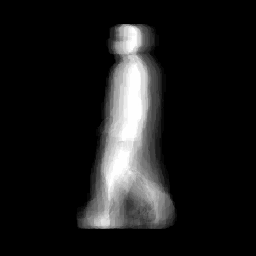

In [0]:
cv2_imshow(np.squeeze(rec_gei[3])*255)

## **Creating 15% occlusion**

In [0]:
occ5=nm05.copy()

In [16]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*15)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

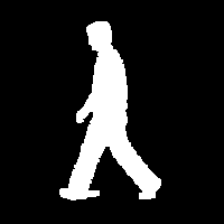

In [18]:
cv2_imshow(vgg_[0][24])

In [19]:
occ_index[0]

array([15, 11,  5])

In [20]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.applications.vgg16 import preprocess_input
#inp=preprocess_input(img[0])
#for i in range(len(occ5()))
#inp=cv2.resize(occ5[0][15],(224,224))
#img = np.stack((inp,)*3, axis=-1)
y=m.predict_classes(np.expand_dims(vgg_[0][12],axis=0))

In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [23]:
occ_detected[22]

array([ 8,  9, 12, 13])

In [24]:
occ_index[22]

array([ 9, 12, 13,  8])

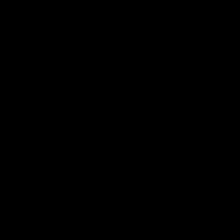

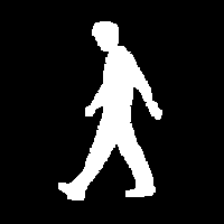

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][20])
cv2_imshow(vgg_[22][19])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/5_frames_occ_created/occ_created_randomly_det_using_vgg_05_15%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

## **Creating 20% Occlusion**

In [0]:
occ5=nm05.copy()

In [16]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*20)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

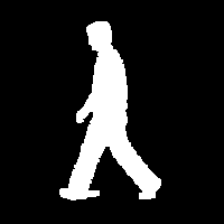

In [18]:
cv2_imshow(vgg_[0][24])

In [19]:
occ_index[0]

array([15, 16, 10,  9, 11])

In [20]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.applications.vgg16 import preprocess_input
#inp=preprocess_input(img[0])
#for i in range(len(occ5()))
#inp=cv2.resize(occ5[0][15],(224,224))
#img = np.stack((inp,)*3, axis=-1)
y=m.predict_classes(np.expand_dims(vgg_[0][12],axis=0))

In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [23]:
occ_detected[22]

array([ 5,  6,  7,  9, 14])

In [24]:
occ_index[22]

array([ 5,  7,  9,  6, 14])

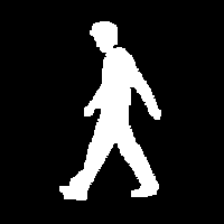

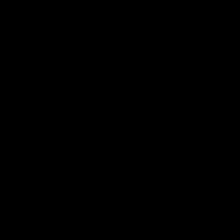

In [33]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][20])
cv2_imshow(vgg_[22][12])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/5_frames_occ_created/occ_created_randomly_det_using_vgg_05_20%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

## **Creating 25% occlusion**

In [0]:
occ5=nm05.copy()

In [20]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*25)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

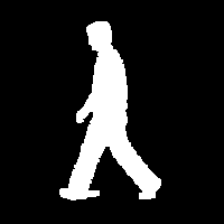

In [22]:
cv2_imshow(vgg_[0][24])

In [23]:
occ_index[0]

array([ 6, 13, 11, 10, 15, 12])

In [24]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.applications.vgg16 import preprocess_input
#inp=preprocess_input(img[0])
#for i in range(len(occ5()))
#inp=cv2.resize(occ5[0][15],(224,224))
#img = np.stack((inp,)*3, axis=-1)
y=m.predict_classes(np.expand_dims(vgg_[0][12],axis=0))

In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [27]:
occ_detected[22]

array([ 6,  8,  9, 10, 13, 16])

In [28]:
occ_index[22]

array([13,  8, 16,  9,  6, 10])

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][20])
cv2_imshow(vgg_[22][19])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/5_frames_occ_created/occ_created_randomly_det_using_vgg_05_25%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

# **Creating 30% Occlusion**

In [0]:
occ5=nm05.copy()

In [16]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*30)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

In [18]:
occ_index[0]

array([16,  7,  5, 12,  8, 11,  9])

In [19]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [21]:
occ_detected[22]

array([ 5,  8,  9, 11, 12, 14, 15, 16])

In [22]:
occ_index[22]

array([ 5,  8, 15, 16, 11, 12,  9, 14])

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][20])
cv2_imshow(vgg_[22][19])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/5_frames_occ_created/occ_created_randomly_det_using_vgg_05_30%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

# **Creating 35% Occlusion**

In [0]:
occ5=nm05.copy()

In [0]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  #occ=np.random.randint(10,len(nm05[i])-1, size=np.int_(((len(nm05[i]))*35)/100))
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*35)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

In [42]:
occ_index[0]

array([11, 14, 10,  5, 13, 15,  6,  7])

In [0]:
from tensorflow.python.keras.models import load_model
m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [0]:
occ_detected[22]

array([10, 12, 13, 15, 18, 19, 20, 24, 26])

In [0]:
occ_index[22]

array([26, 24, 10, 15, 13, 18, 12, 19, 20])

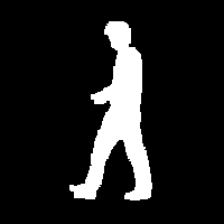

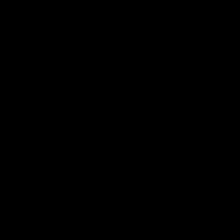

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][4])
cv2_imshow(vgg_[22][10])

In [30]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/9_frames_occ_created/occ_created_randomly_det_using_vgg_05_35%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

NameError: ignored

## **Creating 40% Occlusion**

In [0]:
occ5=nm05.copy()

In [0]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  #occ=np.random.randint(10,len(nm05[i])-1, size=np.int_(((len(nm05[i]))*35)/100))
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*35)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

In [0]:
occ_index[0]

array([19, 13, 15, 16, 12, 17, 14, 24, 18, 20])

In [0]:
from tensorflow.python.keras.models import load_model
#m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [0]:
occ_detected[22]

array([10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 24, 26])

In [0]:
occ_index[22]

array([14, 12, 15, 26, 16, 24, 13, 21, 18, 10])

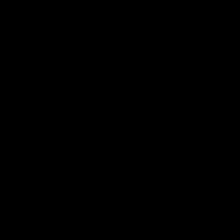

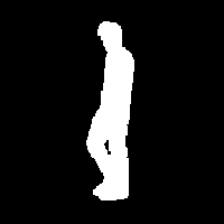

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][10])
cv2_imshow(vgg_[22][1])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/9_frames_occ_created/occ_created_randomly_det_using_vgg_05_40%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

# **Creating 45% Occlusion**

In [0]:
occ5=nm05.copy()

In [0]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  #occ=np.random.randint(10,len(nm05[i])-1, size=np.int_(((len(nm05[i]))*35)/100))
  a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*35)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

In [0]:

occ_index[0]

array([12, 15, 18, 17, 22, 20, 19, 21, 14, 13, 24])

In [0]:
from tensorflow.python.keras.models import load_model
#m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [0]:
occ_detected[22]

array([10, 12, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26])

In [0]:
occ_index[22]

array([21, 10, 14, 19, 12, 16, 22, 26, 24, 17, 25, 18])

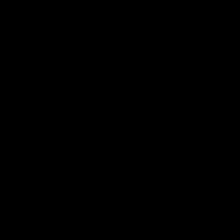

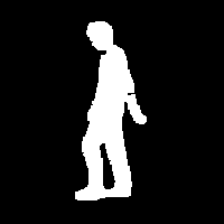

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][10])
cv2_imshow(vgg_[22][15])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/9_frames_occ_created/occ_created_randomly_det_using_vgg_05_45%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})

# **Creating 50% Occlusion**

In [0]:
occ5=nm05.copy()

In [0]:
occ5[0].shape

(25, 256, 256)

In [0]:
blank=np.zeros((256,256))
blank_vgg=np.zeros((224,224,3))
occ_index=[]
for i in range(len(nm05)):
  #occ=np.random.randint(10,len(nm05[i])-1, size=np.int_(((len(nm05[i]))*35)/100))
 a = np.arange(5,17)
  np.random.shuffle(a)
  size=np.int_(((len(nm05[i]))*35)/100)
  occ=a[:size]
  #occ_index.append(np.random.randint(5,19,size=np.int_(((len(nm05[i]))*35)/100)))
  occ_index.append(a[:size])
  for j in range(len(occ)):
    occ5[i][occ[j]]=blank
    vgg_[i][occ[j]]=blank_vgg
occ_index=np.asarray(occ_index)

In [0]:
occ_index[0]

array([19, 16, 13, 21, 15, 11, 22, 14, 18, 24, 10, 20])

In [0]:
from tensorflow.python.keras.models import load_model
#m=load_model('/content/gdrive/My Drive/Occlusion_detector_CASIA.h5',compile=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
occ_detected=[]
for i in range(105):
  temp=[]
  for j in range(len(vgg_[i])):
    if m.predict_classes(np.expand_dims(vgg_[i][j],axis=0))==0:
      temp.append(j)
  occ_detected.append(np.asarray(temp))
occ_detected=np.asarray(occ_detected)

In [0]:
occ_detected[22]

array([10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25])

In [0]:
occ_index[22]

array([24, 16, 21, 19, 25, 20, 18, 12, 23, 11, 17, 14, 10])

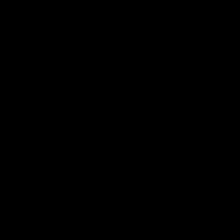

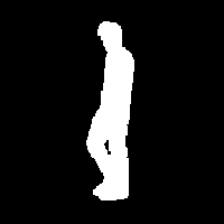

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(vgg_[22][10])
cv2_imshow(vgg_[22][1])

In [0]:
from scipy.io import savemat
savemat('/content/gdrive/My Drive/Results_GAIT/9_frames_occ_created/occ_created_randomly_det_using_vgg_05_50%.mat',{'frames_array':vgg_,'index_of_occluded_frames':occ_detected,'labels':labels_vgg})